**1. Missing Data Handling**

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer

# Load Titanic dataset
titanic = sns.load_dataset("titanic")
print("Original dataset shape:", titanic.shape)
print("Missing values per column:\n", titanic.isnull().sum())

# 1. Dropping rows/columns with missing values
# Option A: Drop rows with any missing values
titanic_drop_rows = titanic.dropna()
print("\nAfter dropping rows with missing values:")
print("Shape:", titanic_drop_rows.shape)
print("Missing values per column:\n", titanic_drop_rows.isnull().sum())

# Option B: Drop columns with any missing values
titanic_drop_cols = titanic.dropna(axis=1)
print("\nAfter dropping columns with missing values:")
print("Shape:", titanic_drop_cols.shape)
print("Missing values per column:\n", titanic_drop_cols.isnull().sum())

# 2. Replacing missing values with mean/median
titanic_fill = titanic.copy()

# For numeric columns, fill missing with median
num_cols = titanic_fill.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    median_val = titanic_fill[col].median()
    titanic_fill[col].fillna(median_val, inplace=True)

# For categorical columns, fill missing with mode
cat_cols = titanic_fill.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    mode_val = titanic_fill[col].mode()[0]
    titanic_fill[col].fillna(mode_val, inplace=True)

print("\nAfter filling missing values with median/mode:")
print("Missing values per column:\n", titanic_fill.isnull().sum())

# 3. Using KNNImputer to impute missing values
# KNNImputer works only on numeric data, so we need to encode categorical variables first
titanic_knn = titanic.copy()

# Encode categorical variables using one-hot encoding (drop first to avoid multicollinearity)
titanic_knn_encoded = pd.get_dummies(titanic_knn, drop_first=True)

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
titanic_knn_imputed_array = imputer.fit_transform(titanic_knn_encoded)

# Convert back to DataFrame
titanic_knn_imputed = pd.DataFrame(titanic_knn_imputed_array, columns=titanic_knn_encoded.columns)

print("\nAfter KNN imputation:")
print("Missing values per column:\n", titanic_knn_imputed.isnull().sum())
print("Shape:", titanic_knn_imputed.shape)

Original dataset shape: (891, 15)
Missing values per column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

After dropping rows with missing values:
Shape: (182, 15)
Missing values per column:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

After dropping columns with missing values:
Shape: (891, 11)
Missing values per column:
 survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

After

/tmp/ipython-input-4283749464.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_fill[col].fillna(median_val, inplace=True)
/tmp/ipython-input-4283749464.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

**2. Scaling Techniques**

Original dataset shape: (20640, 9)


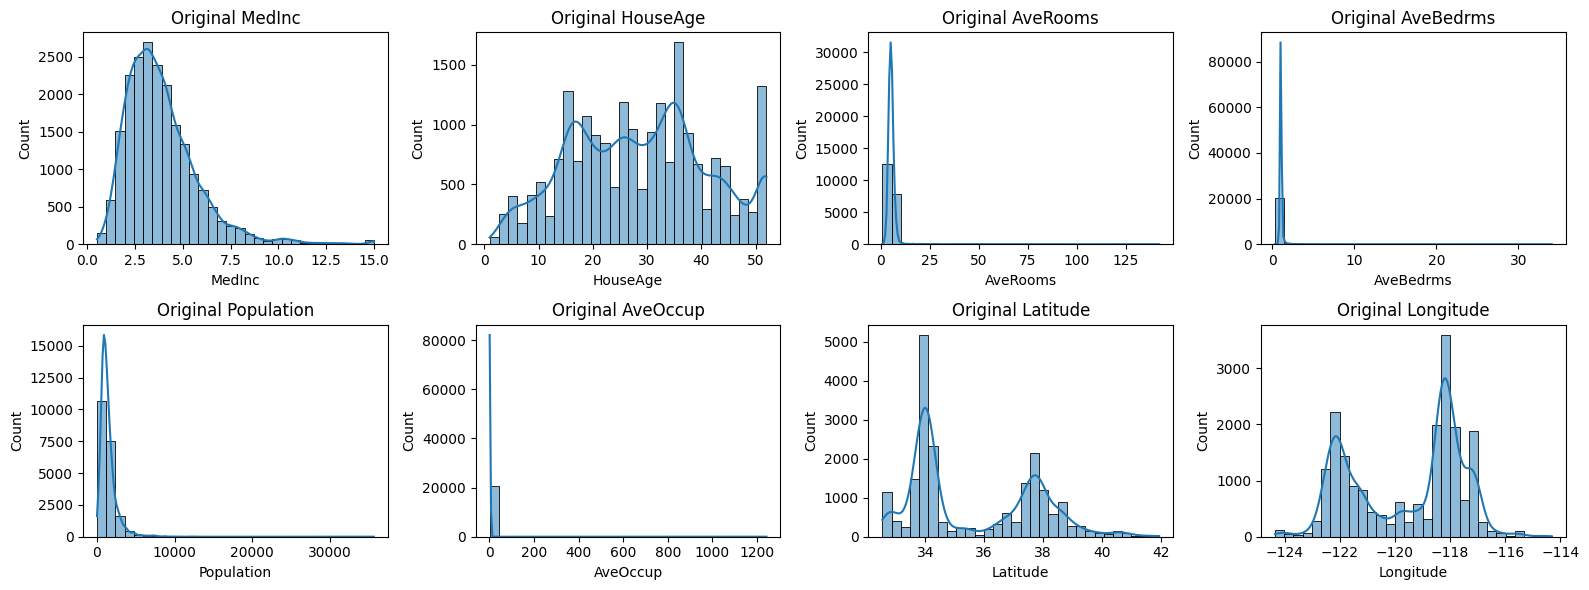

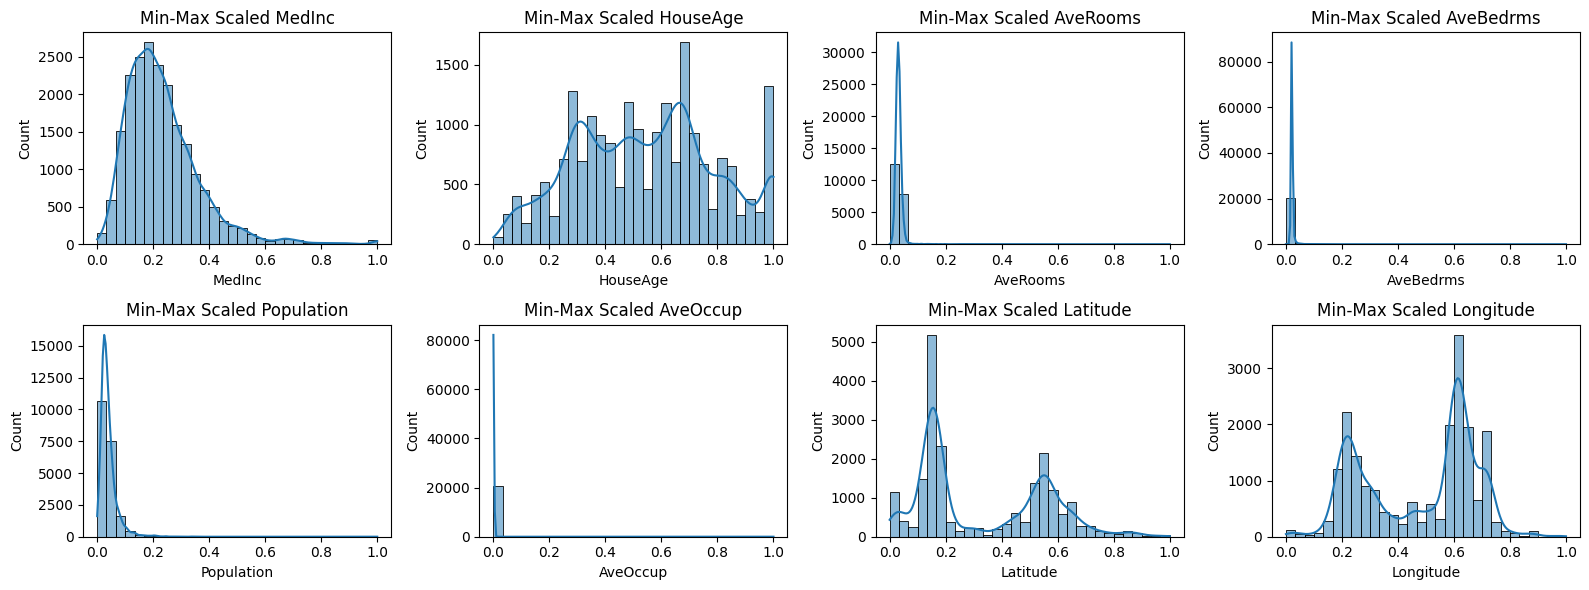

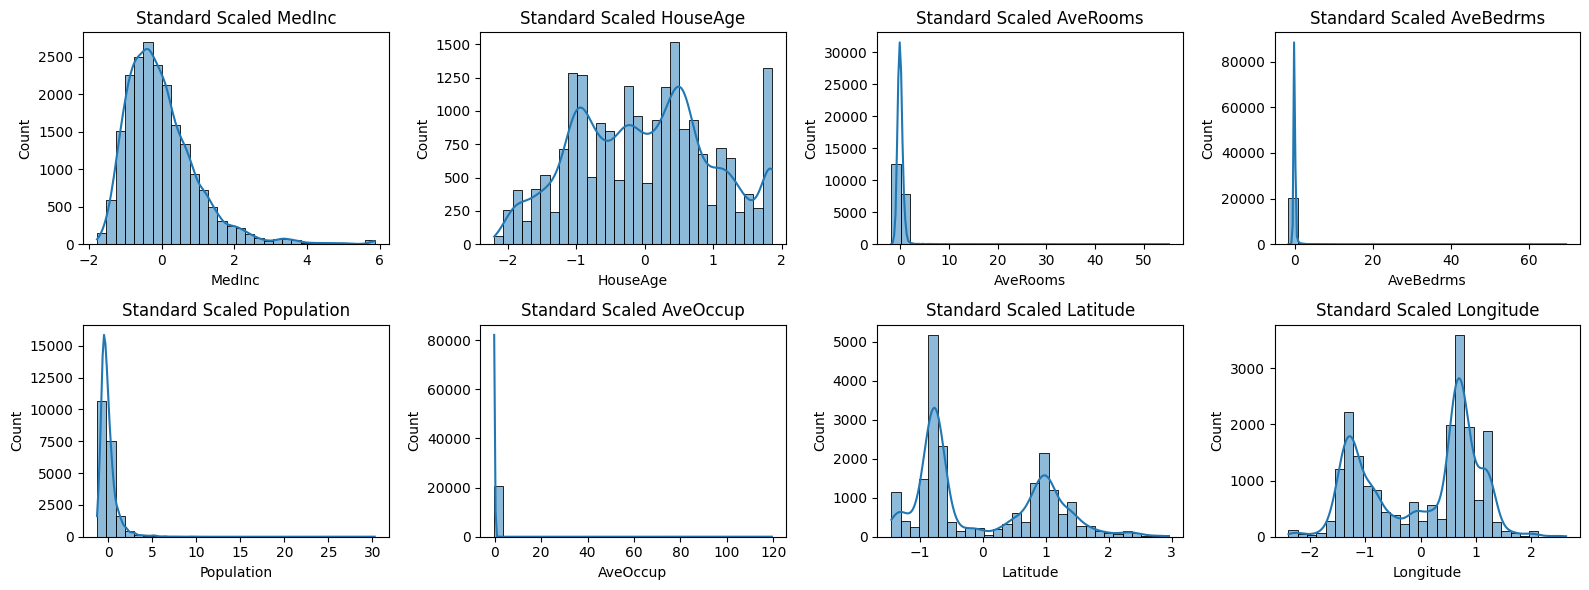

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
print("Original dataset shape:", df.shape)

# Select a few numerical features to plot (all are numerical here)
features = df.columns[:-1]  # exclude target

# Plot distributions before scaling
plt.figure(figsize=(16, 6))
for i, feature in enumerate(features):
    plt.subplot(2, len(features)//2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Original {feature}")
plt.tight_layout()
plt.show()

# Apply Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df[features]), columns=features)

# Plot distributions after Min-Max scaling
plt.figure(figsize=(16, 6))
for i, feature in enumerate(features):
    plt.subplot(2, len(features)//2, i+1)
    sns.histplot(df_minmax_scaled[feature], kde=True, bins=30)
    plt.title(f"Min-Max Scaled {feature}")
plt.tight_layout()
plt.show()

# Apply Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df[features]), columns=features)

# Plot distributions after Standard scaling
plt.figure(figsize=(16, 6))
for i, feature in enumerate(features):
    plt.subplot(2, len(features)//2, i+1)
    sns.histplot(df_standard_scaled[feature], kde=True, bins=30)
    plt.title(f"Standard Scaled {feature}")
plt.tight_layout()
plt.show()

Which scaling technique is more appropriate for features with outliers?

Answer: Robust Scaling is generally more appropriate than Min-Max Scaling or Standard Scaling.

**3. Label Encoding vs One-Hot Encoding**

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Select the 'embarked' column (categorical with missing values)
print("Unique values in 'embarked':", titanic['embarked'].unique())

# Drop rows with missing 'embarked' values for simplicity
titanic_clean = titanic.dropna(subset=['embarked'])

# 1. Label Encoding
label_encoder = LabelEncoder()
embarked_label_encoded = label_encoder.fit_transform(titanic_clean['embarked'])
print("\nLabel Encoded 'embarked' values:")
print(embarked_label_encoded[:10])

# Map back to original categories
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping:", label_mapping)

# 2. One-Hot Encoding
onehot_encoder = OneHotEncoder() # Removed sparse=False
embarked_reshaped = titanic_clean['embarked'].values.reshape(-1, 1)
embarked_onehot_encoded = onehot_encoder.fit_transform(embarked_reshaped)

# Convert to DataFrame for better visualization
# The output of fit_transform is now a sparse matrix by default.
# To convert to a dense array for DataFrame creation, use toarray()
embarked_onehot_df = pd.DataFrame(embarked_onehot_encoded.toarray(), columns=onehot_encoder.categories_[0])
print("\nOne-Hot Encoded 'embarked' (first 10 rows):")
print(embarked_onehot_df.head(10))

Unique values in 'embarked': ['S' 'C' 'Q' nan]

Label Encoded 'embarked' values:
[2 0 2 2 2 1 2 2 2 0]
Label encoding mapping: {'C': np.int64(0), 'Q': np.int64(1), 'S': np.int64(2)}

One-Hot Encoded 'embarked' (first 10 rows):
     C    Q    S
0  0.0  0.0  1.0
1  1.0  0.0  0.0
2  0.0  0.0  1.0
3  0.0  0.0  1.0
4  0.0  0.0  1.0
5  0.0  1.0  0.0
6  0.0  0.0  1.0
7  0.0  0.0  1.0
8  0.0  0.0  1.0
9  1.0  0.0  0.0


**4. Custom Function for Normalization**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

def manual_min_max_normalize(feature):
    """
    Manually normalize a 1D numpy array or pandas Series to the 0-1 range.
    """
    min_val = feature.min()
    max_val = feature.max()
    normalized = (feature - min_val) / (max_val - min_val)
    return normalized

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Select a feature to normalize, e.g., 'sepal length (cm)'
feature_name = 'sepal length (cm)'
feature = df[feature_name]

# Manual normalization
manual_normalized = manual_min_max_normalize(feature)

# MinMaxScaler normalization
scaler = MinMaxScaler()
minmax_scaled = scaler.fit_transform(feature.values.reshape(-1, 1)).flatten()

# Compare results
comparison_df = pd.DataFrame({
    'Original': feature,
    'Manual_Normalized': manual_normalized,
    'MinMaxScaler': minmax_scaled
})

print(comparison_df.head(10))

# Check if both methods produce the same result (within a tolerance)
print("\nAre manual normalization and MinMaxScaler results close?")
print(np.allclose(manual_normalized, minmax_scaled))

   Original  Manual_Normalized  MinMaxScaler
0       5.1           0.222222      0.222222
1       4.9           0.166667      0.166667
2       4.7           0.111111      0.111111
3       4.6           0.083333      0.083333
4       5.0           0.194444      0.194444
5       5.4           0.305556      0.305556
6       4.6           0.083333      0.083333
7       5.0           0.194444      0.194444
8       4.4           0.027778      0.027778
9       4.9           0.166667      0.166667

Are manual normalization and MinMaxScaler results close?
True


**5. Imputation with Domain Knowledge**

In [ ]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Check missing values in 'age'
print("Missing values in 'age' before imputation:", titanic['age'].isnull().sum())

# Step 1: Calculate median age per 'class'
median_age_per_class = titanic.groupby('class')['age'].median()
print("\nMedian age per class:")
print(median_age_per_class)

# Step 2: Define a function to fill missing 'age' based on 'class'
def fill_age(row):
    if pd.isnull(row['age']):
        return median_age_per_class[row['class']]
    else:
        return row['age']

# Step 3: Apply the function row-wise
titanic['age_imputed'] = titanic.apply(fill_age, axis=1)

# Check missing values after imputation
print("\nMissing values in 'age_imputed' after imputation:", titanic['age_imputed'].isnull().sum())

# Optional: Show some rows to compare original and imputed ages
print("\nSample rows with original and imputed ages:")
print(titanic[['age', 'class', 'age_imputed']].head(10))

Missing values in 'age' before imputation: 177

Median age per class:
class
First     37.0
Second    29.0
Third     24.0
Name: age, dtype: float64

Missing values in 'age_imputed' after imputation: 0

Sample rows with original and imputed ages:
    age   class  age_imputed
0  22.0   Third         22.0
1  38.0   First         38.0
2  26.0   Third         26.0
3  35.0   First         35.0
4  35.0   Third         35.0
5   NaN   Third         24.0
6  54.0   First         54.0
7   2.0   Third          2.0
8  27.0   Third         27.0
9  14.0  Second         14.0


/tmp/ipython-input-2516700729.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_age_per_class = titanic.groupby('class')['age'].median()


**6. Detecting Outliers**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Feature to analyze
feature = 'MedHouseVal'  # median house value

# 1. Z-score method
def detect_outliers_zscore(data, threshold=3):
    mean_val = data.mean()
    std_val = data.std()
    z_scores = (data - mean_val) / std_val
    outliers = data[np.abs(z_scores) > threshold]
    return outliers

# 2. IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect outliers using Z-score
outliers_zscore = detect_outliers_zscore(df[feature])
print(f"Number of outliers detected by Z-score method: {len(outliers_zscore)}")

# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df[feature])
print(f"Number of outliers detected by IQR method: {len(outliers_iqr)}")

# Show some outlier values detected by each method
print("\nSample outliers detected by Z-score method:")
print(outliers_zscore.head())

print("\nSample outliers detected by IQR method:")
print(outliers_iqr.head())

# Optional: Compare overlap between the two methods
overlap = set(outliers_zscore.index).intersection(set(outliers_iqr.index))
print(f"\nNumber of outliers detected by both methods: {len(overlap)}")

Number of outliers detected by Z-score method: 0
Number of outliers detected by IQR method: 1071

Sample outliers detected by Z-score method:
Series([], Name: MedHouseVal, dtype: float64)

Sample outliers detected by IQR method:
89     5.00001
140    4.83300
459    5.00001
489    4.89600
493    5.00001
Name: MedHouseVal, dtype: float64

Number of outliers detected by both methods: 0


**7. Feature Engineering**

Sample 'FamilySize' values:
   sibsp  parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1

Scaled 'FamilySize' values (first 10 rows):
   FamilySize  FamilySize_MinMax  FamilySize_Standard
0           2                0.1             0.059160
1           2                0.1             0.059160
2           1                0.0            -0.560975
3           2                0.1             0.059160
4           1                0.0            -0.560975
5           1                0.0            -0.560975
6           1                0.0            -0.560975
7           5                0.4             1.919564
8           3                0.2             0.679295
9           2                0.1             0.059160


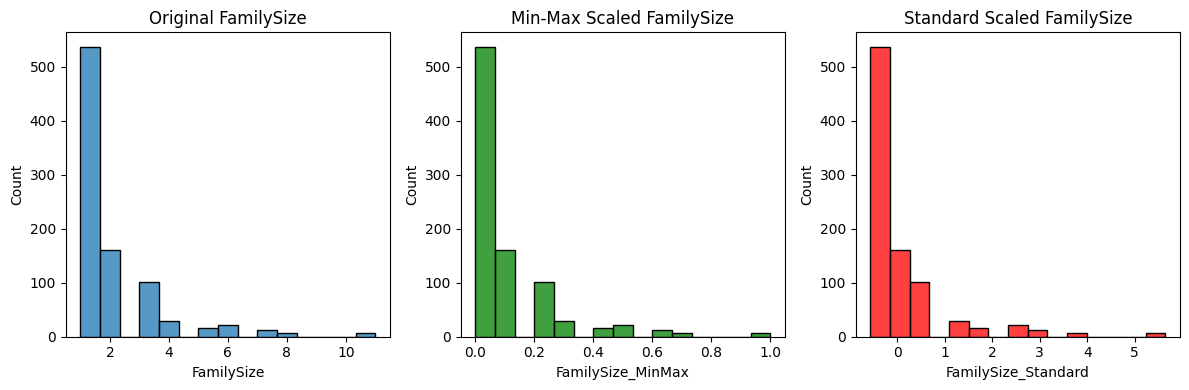

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Create new feature 'FamilySize'
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch'] + 1

print("Sample 'FamilySize' values:")
print(titanic[['sibsp', 'parch', 'FamilySize']].head())

# Extract the new feature as a DataFrame for scaling
family_size = titanic[['FamilySize']]

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
family_size_minmax = minmax_scaler.fit_transform(family_size)

# Apply Standard Scaling
standard_scaler = StandardScaler()
family_size_standard = standard_scaler.fit_transform(family_size)

# Add scaled features back to DataFrame
titanic['FamilySize_MinMax'] = family_size_minmax
titanic['FamilySize_Standard'] = family_size_standard

# Display first few rows with new features
print("\nScaled 'FamilySize' values (first 10 rows):")
print(titanic[['FamilySize', 'FamilySize_MinMax', 'FamilySize_Standard']].head(10))

# Optional: Plot distributions before and after scaling
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(titanic['FamilySize'], bins=15, kde=False)
plt.title('Original FamilySize')

plt.subplot(1, 3, 2)
sns.histplot(titanic['FamilySize_MinMax'], bins=15, kde=False, color='g')
plt.title('Min-Max Scaled FamilySize')

plt.subplot(1, 3, 3)
sns.histplot(titanic['FamilySize_Standard'], bins=15, kde=False, color='r')
plt.title('Standard Scaled FamilySize')

plt.tight_layout()
plt.show()